# Rat LPS VAMPIRE Data Analysis

Teng-Jui Lin

23 May 2022

Objective: Analyze data obtained from VAMPIRE analysis for rat LPS model.

## Import VAMPIRE analysis data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [2]:
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-05-19-rat-lps'
model_path = os.path.join(output_path, 'model_rat-lps_(50_5_33)__.pickle')
vampire_model = vp.util.read_pickle(model_path)
property_path = os.path.join(output_path, 'apply-properties_rat-lps_on_rat-lps_(50_5_33)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)

## Data processing

### Label experimental metadata

In [3]:
apply_properties_df.head()

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid
0,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,1,12.460606,687.230303,165,108.047727,27.401044,14.490758,0.848722,0.522152,0.404412,"[[2, 3, 4, 5, 6, 5, 7, 7, 8, 9, 10, 9, 10, 10,...",0.177608,1.890932,"[1.6353040771383043, 1.7163810106518922, 1.418...",0,0.780588
1,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,2,18.018470,1397.881266,379,101.633514,24.816875,20.931283,0.537240,0.825708,0.638047,"[[15, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, ...",0.461079,1.185636,"[0.9771924237789447, 1.1453045611748363, 1.189...",4,0.669492
2,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,3,19.225470,1042.060543,479,249.580736,85.345163,13.065085,0.988213,0.463698,0.208624,"[[76, 77, 79, 81, 80, 79, 77, 71, 70, 67, 66, ...",0.096633,6.532308,"[1.6789184548842866, 1.4543568406969112, 1.253...",1,0.550435
3,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,4,26.551724,124.913793,174,66.284271,22.029073,12.827129,0.812987,0.769912,0.487395,"[[11, 11, 12, 14, 14, 16, 16, 14, 13, 13, 9, 8...",0.497666,1.717382,"[1.2186203487269303, 1.3777362208352035, 1.350...",2,0.745616
4,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,5,28.321918,1477.808219,146,86.976659,31.979941,9.866010,0.951222,0.491582,0.289683,"[[2, 3, 4, 5, 6, 8, 8, 10, 11, 12, 11, 11, 12,...",0.242525,3.241426,"[1.6261754896860003, 1.6041735138097717, 1.440...",2,0.805937


In [4]:
def label_df(properties_df, id_df, target_props, search_prop='filename'):
    """
    properties_df : DataFrame
        Contains "filename" column
    id_df : DataFrame
        Contains columns listed in `properties` and "regex" column.
    target_props : list
        List of property(s) to be added. Must match column name in `id_df`.
    """
    properties_df = properties_df.copy()
    properties_df[target_props] = np.nan
    for i in range(id_df['regex'].size):
        mask = properties_df[search_prop].astype(str).str.contains(id_df['regex'][i])
        properties_df.loc[mask, target_props] = id_df.iloc[i, :][target_props].values
    return properties_df

In [5]:
treatment_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-lps-data-labels\rat-lps-treatment-labels.xlsx')
treatment_id_df.head()

,id,treatment,regex
0,LPS_1ug,LPS 1 ug,LPS_1ug(?!_serum)
1,LPS_100ng,LPS 0.1 ug,LPS_100ng
2,NT,NC,NT(?!_serum)
3,LPS_1ug_serum,LPS 1 ug + Serum,LPS_1ug_serum
4,LPS_10ug,LPS 10 ug,LPS_10ug


In [6]:
treatment_time_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-lps-data-labels\rat-lps-treatment-time-labels.xlsx')
treatment_time_id_df.head()

,id,treatment_time,regex
0,24h,24 h,24h
1,72h,72 h,72h


In [7]:
other_time_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-lps-data-labels\rat-lps-other-time-labels.xlsx')
other_time_id_df.head()

,id,other_time,regex
0,-3-,-3,-3-
1,0-,0,^((?!-3-).)*$


In [8]:
apply_properties_df = label_df(apply_properties_df, treatment_id_df, ['treatment'])
apply_properties_df = label_df(apply_properties_df, treatment_time_id_df, ['treatment_time'])
apply_properties_df = label_df(apply_properties_df, other_time_id_df, ['other_time'])
vp.util.write_pickle(os.path.join(output_path, 'labeled-apply-properties_rat-lps_on_rat-lps_(50_5_33)__.pickle'), apply_properties_df)
apply_properties_df

C:\Users\owen4\AppData\Local\Temp\ipykernel_17324\4201282033.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = properties_df[search_prop].astype(str).str.contains(id_df['regex'][i])


,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,...,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid,treatment,treatment_time,other_time
0,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,1,12.460606,687.230303,165,108.047727,27.401044,14.490758,0.848722,...,0.404412,"[[2, 3, 4, 5, 6, 5, 7, 7, 8, 9, 10, 9, 10, 10,...",0.177608,1.890932,"[1.6353040771383043, 1.7163810106518922, 1.418...",0,0.780588,LPS 0.1 ug,24 h,0.0
1,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,2,18.018470,1397.881266,379,101.633514,24.816875,20.931283,0.537240,...,0.638047,"[[15, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, ...",0.461079,1.185636,"[0.9771924237789447, 1.1453045611748363, 1.189...",4,0.669492,LPS 0.1 ug,24 h,0.0
2,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,3,19.225470,1042.060543,479,249.580736,85.345163,13.065085,0.988213,...,0.208624,"[[76, 77, 79, 81, 80, 79, 77, 71, 70, 67, 66, ...",0.096633,6.532308,"[1.6789184548842866, 1.4543568406969112, 1.253...",1,0.550435,LPS 0.1 ug,24 h,0.0
3,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,4,26.551724,124.913793,174,66.284271,22.029073,12.827129,0.812987,...,0.487395,"[[11, 11, 12, 14, 14, 16, 16, 14, 13, 13, 9, 8...",0.497666,1.717382,"[1.2186203487269303, 1.3777362208352035, 1.350...",2,0.745616,LPS 0.1 ug,24 h,0.0
4,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,5,28.321918,1477.808219,146,86.976659,31.979941,9.866010,0.951222,...,0.289683,"[[2, 3, 4, 5, 6, 8, 8, 10, 11, 12, 11, 11, 12,...",0.242525,3.241426,"[1.6261754896860003, 1.6041735138097717, 1.440...",2,0.805937,LPS 0.1 ug,24 h,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,8,886.611429,32.811429,175,84.840620,27.762738,10.919180,0.919409,...,0.388889,"[[19, 20, 22, 23, 24, 24, 23, 22, 19, 20, 21, ...",0.305520,2.542566,"[1.6078431922625, 1.4862744354178652, 1.373884...",0,0.857990,NC + Serum,24 h,0.0
1056,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,9,951.806818,200.065341,352,211.237590,48.018585,33.740386,0.711533,...,0.279365,"[[12, 13, 22, 23, 25, 26, 27, 27, 28, 28, 31, ...",0.099131,1.423178,"[0.47985111030744276, 0.8772004334136061, 1.19...",2,0.711692,NC + Serum,24 h,0.0
1057,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,10,1090.952586,19.340517,232,106.533009,31.690446,12.397036,0.920309,...,0.426471,"[[5, 5, 4, 4, 5, 4, 4, 5, 6, 6, 8, 7, 8, 7, 6,...",0.256880,2.556292,"[0.9339253563562309, 1.101372642539264, 1.2977...",1,0.811895,NC + Serum,24 h,0.0
1058,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,11,1306.688073,217.779817,218,162.331998,39.593625,36.349899,0.396408,...,0.203169,"[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, ...",0.103958,1.089236,"[0.6718678970140516, 0.5020731538399602, 0.705...",0,0.787545,NC + Serum,24 h,0.0


### Label cluster coloring

In [9]:
from matplotlib.colors import to_hex
color_id_df = pd.DataFrame({
    'cluster_id': [0, 1, 2, 3, 4],
    'color': [to_hex(plt.get_cmap('twilight')(np.linspace(0.1, 0.9, 5))[i]) for i in range(5)],
})
color_id_df['regex'] = color_id_df['cluster_id'].astype(str)

In [10]:
label_colors = label_df(apply_properties_df, color_id_df, ['color'], 'cluster_id').color.values
label_colors

array(['#a6bfca', '#d0b39e', '#5f58b0', ..., '#5f58b0', '#a6bfca',
       '#a6bfca'], dtype=object)

## Visualization of data

### Number of microglia in each group

<AxesSubplot:>

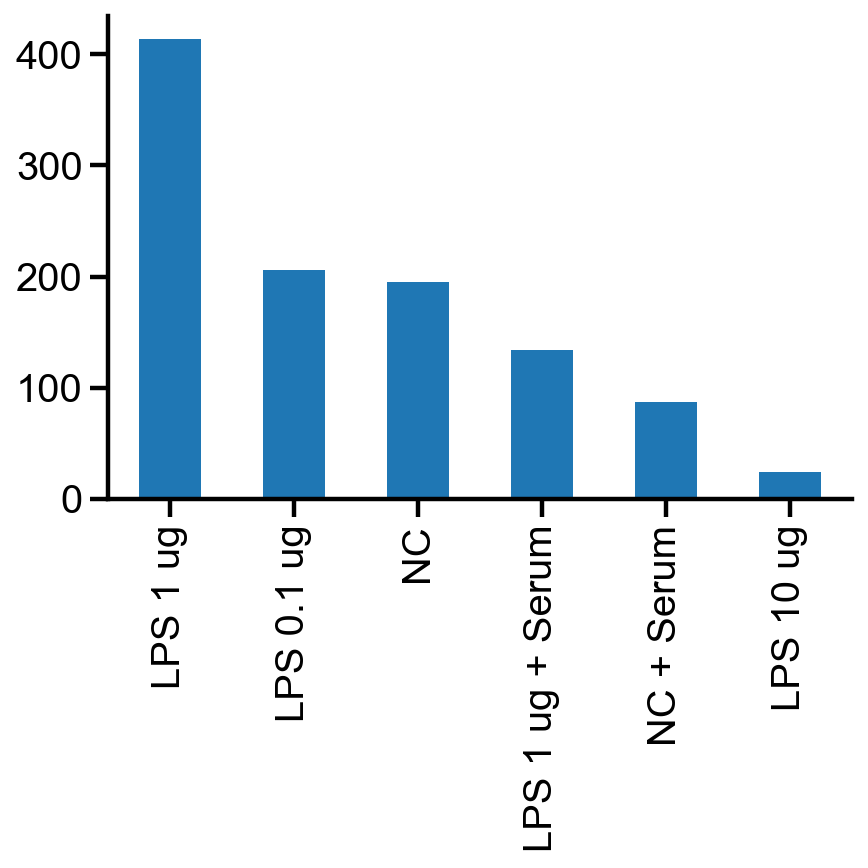

In [11]:
apply_properties_df['treatment'].value_counts().plot(kind='bar')

<AxesSubplot:>

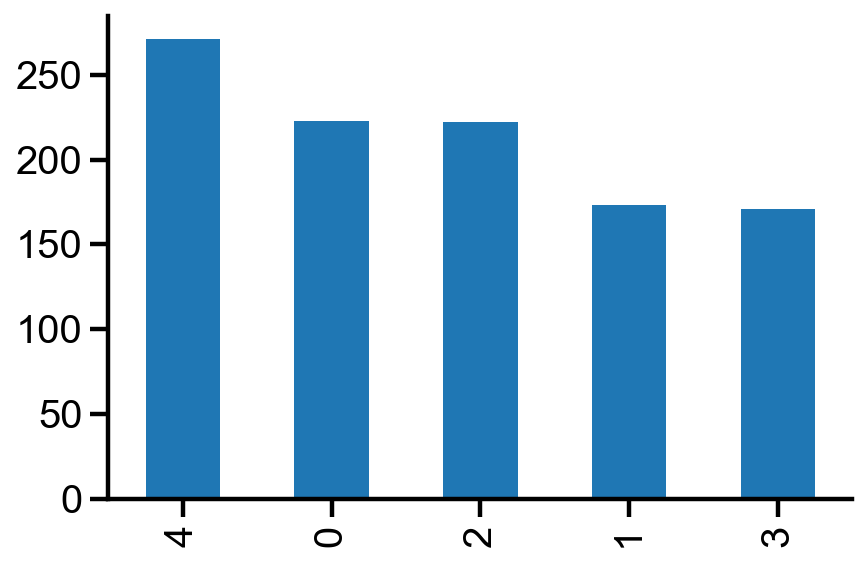

In [12]:
apply_properties_df['cluster_id'].value_counts().plot(kind='bar')  # shape mode distribution

### Creating DataFrames for GraphPad Prism Visualization

The resulting DataFrames are saved into csv that can be imported to GraphPad Prism for statistical analysis and visualization.

#### Categorical scatterplot of (morphological parameter) vs. (category)

In [13]:
properties = ['area', 'perimeter', 'circularity', 'aspect_ratio', 'solidity', 'eccentricity', 'extent', 'distance_to_centroid']

In [14]:
def get_categorical_df(input_df, feature, category):
    """
    Create DataFrame for GraphPad Prism "column table" visualization of categorical scatter plots.
    Numerical feature vs. catagorical variable.
    
    input_df : DataFrame
        Contains `feature` and `category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    """
    category_items = np.unique(input_df[category])
    data = [input_df[(input_df[category] == i)]
            [feature].reset_index(drop=True) 
            for i in category_items]
    df = pd.concat(data, axis=1)
    df.columns = category_items
    return df

In [15]:
# categorical scatterplot of (morphological parameter) vs. (category)
# one plot for each (morphological parameter)
# for prop in properties:
    # get_categorical_df(apply_properties_df, prop, 'region')

#### Categorical scatterplot of (morphological parameter) vs. (category) with (controlled category)

In [16]:
def get_controlled_categorical_dfs(input_df, feature, category, controlled_category):
    """
    Create DataFrames for GraphPad Prism "column table" visualization of grouped categorical scatter plots.
    Numerical feature vs. catagorical variable with one categorical variable controlled.
    
    input_df : DataFrame
        Contains `feature` and `category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    """
    category_items = np.unique(input_df[category])
    controlled_category_items = np.unique(input_df[controlled_category])
    dfs = []
    for controlled_category_item in controlled_category_items:
        data = [input_df[(input_df[category] == i)]
                [input_df[(input_df[category] == i)][controlled_category] == controlled_category_item]
                [feature].reset_index(drop=True) 
                for i in category_items]
        df = pd.concat(data, axis=1)
        df.columns = category_items
        dfs.append(df)
    return dfs

In [17]:
# categorical scatterplots of (morphological parameter) vs. (category) with (controlled category)
# for prop in properties:
    # get_controlled_categorical_dfs(apply_properties_df, prop, 'region', 'cluster_id')

#### Heatmap of (morphological parameter) with (category) vs. (controlled category)

In [18]:
def get_heatmap_df(input_df, feature, category, controlled_category, statistics='median'):
    """
    Create DataFrame for GraphPad Prism "contingency tables" visualization of heatmap.
    Categorical variable vs. catagorical variable of heatmap of numerical feature.
    
    input_df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    statistics : str, optional
        Statistical parameter of interest. Default "median".
    """
    return pd.pivot_table(input_df.groupby(by=[category, controlled_category]).agg(statistics),
                                           values=feature,
                                           index=[category],
                                           columns=[controlled_category])

In [19]:
get_heatmap_df(apply_properties_df, 'circularity', 'treatment', 'cluster_id')

cluster_id,0,1,2,3,4
treatment,,,,,
LPS 0.1 ug,0.248830,0.285625,0.242525,0.302301,0.421660
LPS 1 ug,0.223014,0.241719,0.221446,0.303144,0.495733
LPS 1 ug + Serum,0.211200,0.242103,0.248600,0.327919,0.389907
LPS 10 ug,0.267871,0.259403,0.378573,0.320983,0.592337
NC,0.219451,0.212582,0.210219,0.262756,0.452141
NC + Serum,0.223650,0.245480,0.226902,0.341928,0.529336


The resulting DataFrame can be used for heatmap visualization in both GraphPad Prism and Python. Here, we demonstrate visualization using Python.

### Population trend of morphological parameters

#### Treatment vs. cluster

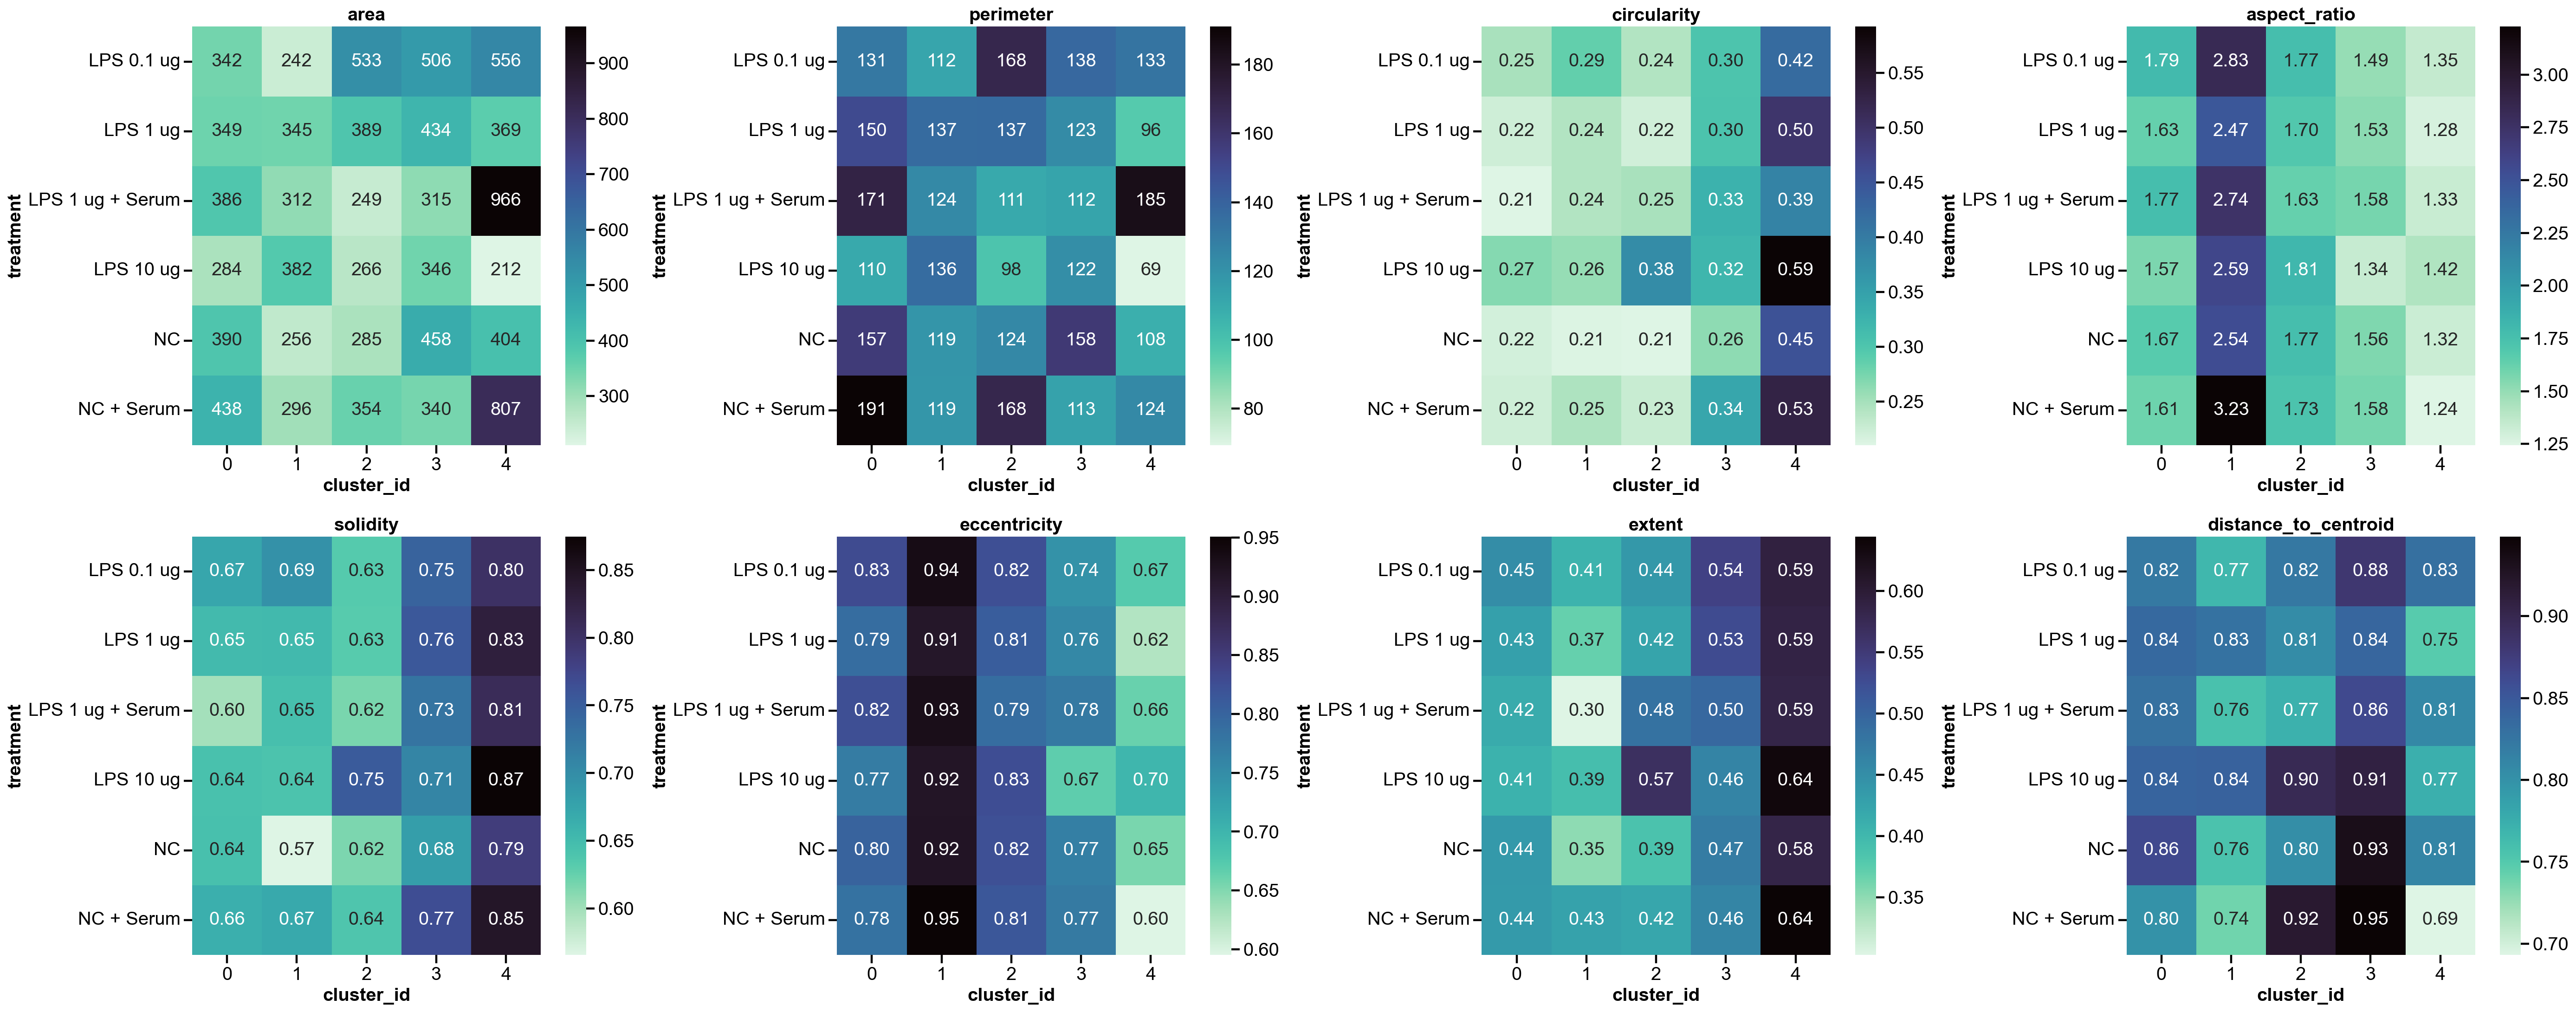

In [20]:
col = 4
row = 2
scale = 7

fig, axs = plt.subplots(row, col, figsize=((col+1)*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            heatmap_df = get_heatmap_df(apply_properties_df, properties[i], 'treatment', 'cluster_id')
            if heatmap_df.max().max() > 10:
                fmt = '.0f'
            else:
                fmt = '.2f'
                
            sns.heatmap(heatmap_df,
                        square=True,
                        annot=True,
                        fmt=fmt,
                        ax=axs[row_i, col_i],
                        cmap='mako_r')
            axs[row_i, col_i].set_title(properties[i])
plt.tight_layout()

### Changes of morphological parameters

#### Functions for plotting changes

In [21]:
def compute_arrow(df, feature, category, category_item,
                  controlled_category, init_controlled_category, final_controlled_category):
    """
    Calculate the initial y value of arrow and the length of the arrow.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    category_item : str
        Name of category item for arrow comparison. 
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    final_controlled_category : str
        Name of controlled category to be compared to baseline.
    """
    cluster_cond = df[category] == category_item
    treatment_cond = df[controlled_category] == init_controlled_category
    init_value = df[cluster_cond & treatment_cond][feature].values[0]
    cluster_cond = df[category] == category_item
    treatment_cond = df[controlled_category] == final_controlled_category
    final_value = df[cluster_cond & treatment_cond][feature].values[0]
    difference = final_value - init_value
    return init_value, difference

In [22]:
def plot_arrow(df, feature, category, controlled_category, init_controlled_category, final_controlled_category, ax, displace=1, facecolor='black'):
    """
    Plot an arrow from initial value to final value for all categories in x-axis.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    final_controlled_category : str
        Name of controlled category to be compared to baseline.
    ax : matplotlib.axes.Axes
    displace : int
        Horizontal displacement of arrow from the original plot. Default 1.
    facecolor : str
        Facecolor of arrow.
    """
    category_items = np.unique(df[category])
    head_langth = 0.03 * np.diff(ax.get_ylim())[0]  # scale the arrow head length
    for i, category_item in enumerate(category_items):
        init, diff = compute_arrow(df=df,
                                   feature=feature, 
                                   category=category, 
                                   category_item=category_item,
                                   controlled_category=controlled_category, 
                                   init_controlled_category=init_controlled_category, 
                                   final_controlled_category=final_controlled_category)
        if abs(diff) >= head_langth:  # does not show small changes
            ax.arrow(i+0.15*displace, 
                     init,
                     0, 
                     diff, 
                     length_includes_head=True, 
                     width=0.03, 
                     head_width=0.1, 
                     head_length=head_langth,
                     facecolor=facecolor, 
                     edgecolor='none')

In [23]:
def plot_baseline_arrows(df, feature, category, controlled_category, init_controlled_category, ax, cmap=plt.get_cmap("tab10")):
    """
    Plot arrows from a baseline initial value to final values of different 
    controlled categories for all categories in x-axis.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    ax : matplotlib.axes.Axes
    cmap : plt.get_cmap()
    """
    controlled_category_items = np.unique(df[controlled_category])
    for j, controlled_category_item in enumerate(controlled_category_items):
        plot_arrow(df=df, 
                   feature=feature, 
                   category=category, 
                   controlled_category=controlled_category, 
                   init_controlled_category=init_controlled_category, 
                   final_controlled_category=controlled_category_item, 
                   ax=ax, 
                   displace=j+1, 
                   facecolor=cmap(j))

In [24]:
def plot_basline_change(df, feature, category, controlled_category, init_controlled_category, ax, cmap=plt.get_cmap("tab10")):
    """
    Plots changes of numerical feature in response to one categorical variable
    while holding another categorical variable constant for all categories
    compared to a baseline.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    ax : matplotlib.axes.Axes
    cmap : plt.get_cmap()
    """
    sns.stripplot(x=category, 
                  y=feature, 
                  hue=controlled_category,  
                  data=df, 
                  jitter=False, 
                  marker='o', 
                  ax=ax)
    plot_baseline_arrows(df=df, 
                         feature=feature, 
                         category=category, 
                         controlled_category=controlled_category, 
                         init_controlled_category=init_controlled_category, 
                         ax=ax, 
                         cmap=cmap)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
def plot_change(df, feature, category, controlled_category, init_controlled_categories, final_controlled_categories, facecolors, ax):
    """
    Plots changes of numerical feature in response to one categorical variable
    while holding another categorical variable constant for
    `init_controlled_categories` compared to `final_controlled_categories`.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_categories : list
        Names of controlled category set as baseline.
    final_controlled_categories : list
        Names of controlled category compared to baseline.
    facecolors : list
        Names of facecolors of arrows.
    ax : matplotlib.axes.Axes
    
    Raises
    ------
    ValueError
        If `init_controlled_categories`, `final_controlled_categories`, 
        and `facecolors` does not have the same length.
    """
    if not len(init_controlled_categories) == len(final_controlled_categories) == len(facecolors):
        raise ValueError('`init_controlled_categories`, `final_controlled_categories`, and `facecolors` does not have the same length.')
    sns.stripplot(x=category, 
                  y=feature, 
                  hue=controlled_category,  
                  data=df, 
                  jitter=False, 
                  marker='o', 
                  ax=ax)
    for i in range(len(init_controlled_categories)):
        plot_arrow(df=df, 
                   feature=feature, 
                   category=category, 
                   controlled_category=controlled_category, 
                   init_controlled_category=init_controlled_categories[i], 
                   final_controlled_category=final_controlled_categories[i],
                   displace=i+1,
                   ax=ax, 
                   facecolor=facecolors[i])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Changes in response to injury (No serum)

In [26]:
injury_df = apply_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
injury_cond = (~injury_df['treatment'].isin(['LPS 1 ug + Serum', 'NC + Serum']))
injury_df = injury_df[injury_cond]
injury_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid,other_time
0,LPS 0.1 ug,0,0.0,35.0,683.229358,687.230303,342.0,131.254834,36.393162,19.421364,0.829274,0.672131,0.451020,0.248830,1.789414,0.822287,0.0
1,LPS 0.1 ug,1,2.0,25.0,650.647887,742.992366,242.0,111.947222,34.491805,13.361280,0.935377,0.694759,0.406433,0.285625,2.827646,0.766846,0.0
2,LPS 0.1 ug,2,1.0,28.0,620.793510,756.470588,533.0,168.302561,41.354709,24.525195,0.824858,0.633858,0.438821,0.242525,1.768848,0.823780,0.0
3,LPS 0.1 ug,3,1.0,37.0,714.675236,975.348052,506.0,137.953319,35.965968,23.207367,0.742870,0.745257,0.539627,0.302301,1.493795,0.881397,0.0
4,LPS 0.1 ug,4,1.0,36.5,705.269477,660.809880,556.0,132.725397,31.366030,23.356809,0.673072,0.801647,0.592130,0.421660,1.352126,0.830391,0.0


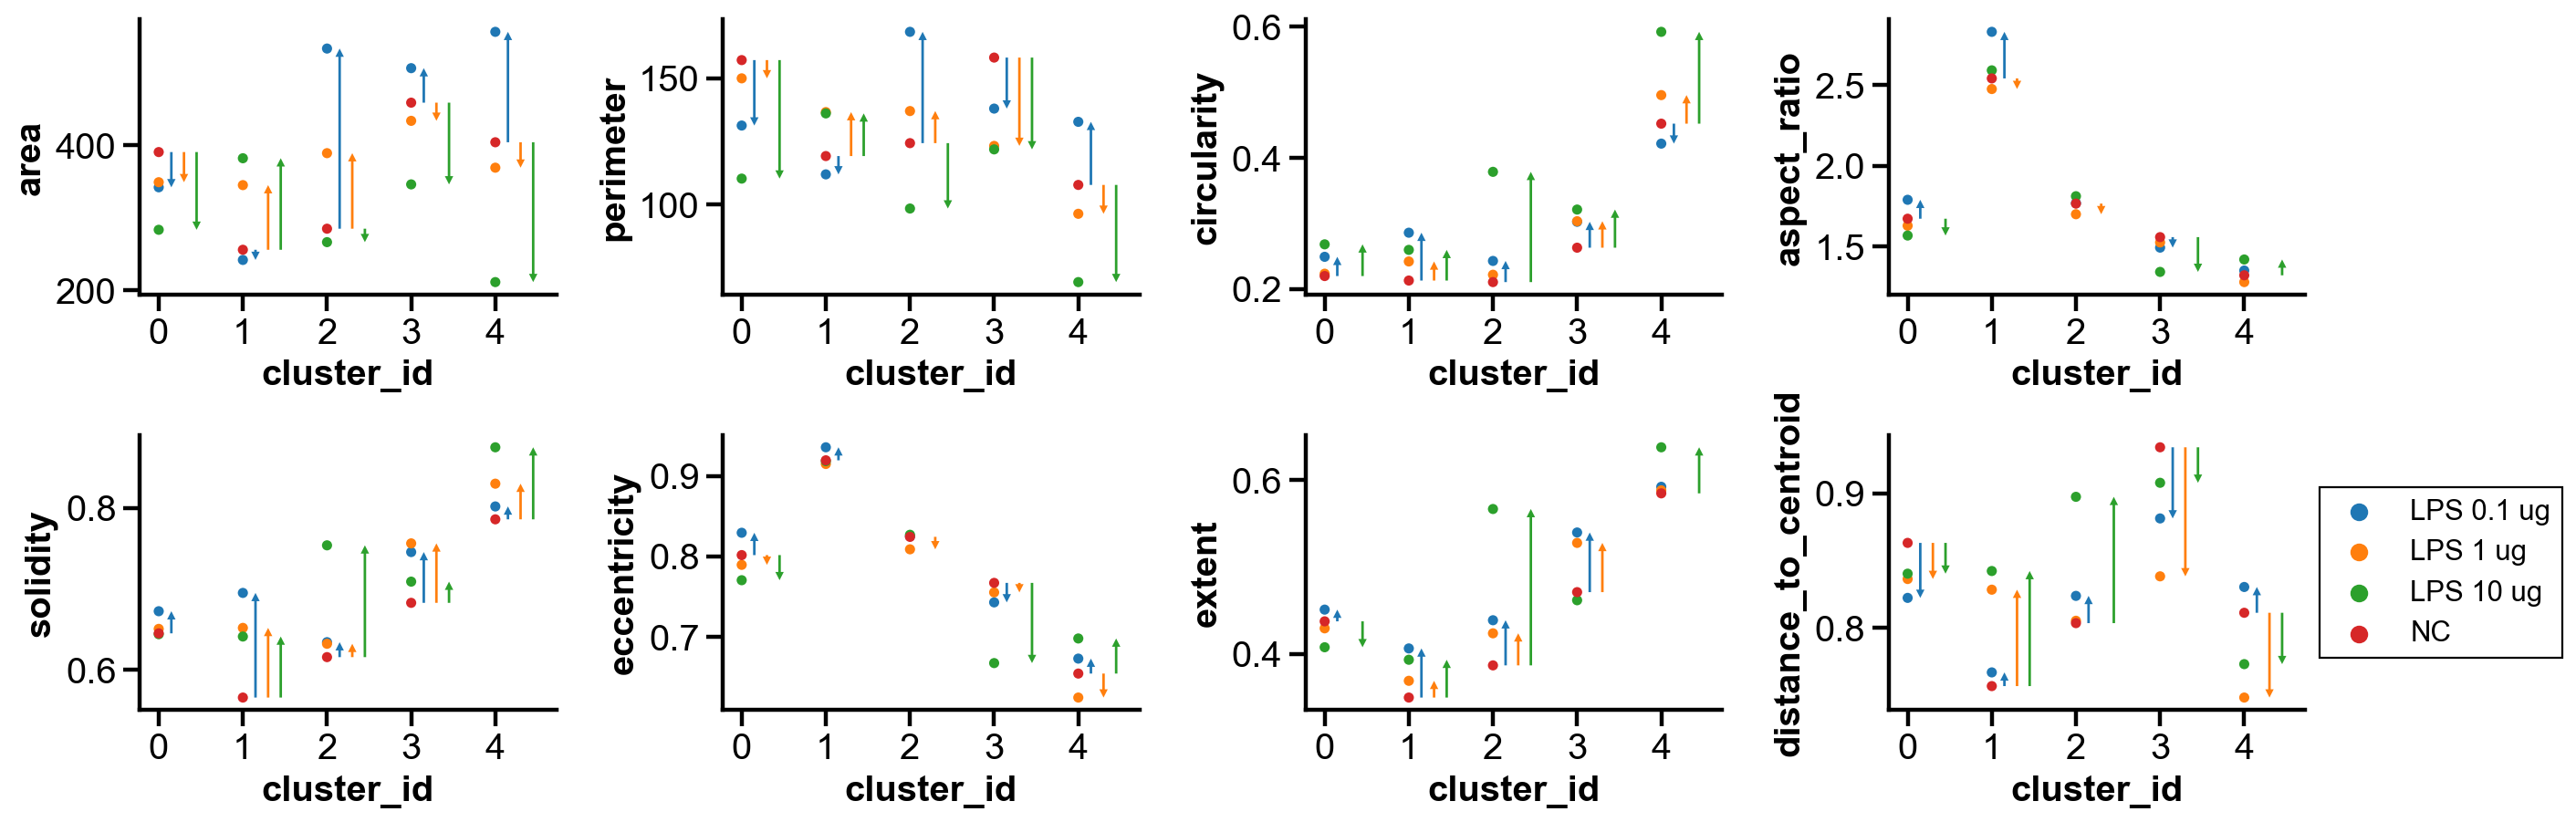

In [27]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=injury_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_category='NC', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes in response to injury (With serum)

In [28]:
injury_df = apply_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
injury_cond = (injury_df['treatment'].isin(['LPS 1 ug + Serum', 'NC + Serum']))
injury_df = injury_df[injury_cond]
injury_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid,other_time
10,LPS 1 ug + Serum,0,22.0,25.0,734.020270,868.130191,386.0,170.917785,39.774548,20.777653,0.824644,0.598444,0.416162,0.211200,1.767871,0.829112,0.0
11,LPS 1 ug + Serum,1,21.0,33.0,971.779107,1158.992026,312.0,123.568542,40.629828,14.379954,0.931095,0.645807,0.302713,0.242103,2.741396,0.757731,0.0
12,LPS 1 ug + Serum,2,23.0,21.0,769.131653,899.937653,249.0,110.704581,27.079359,17.084052,0.789327,0.616883,0.483740,0.248600,1.628735,0.772509,0.0
13,LPS 1 ug + Serum,3,22.0,19.0,900.506849,835.517241,315.0,112.189863,33.493662,17.524410,0.775094,0.726688,0.495614,0.327919,1.582665,0.863311,0.0
14,LPS 1 ug + Serum,4,23.0,28.5,853.951367,727.766155,966.0,184.648755,44.043478,30.987046,0.662009,0.810101,0.585298,0.389907,1.334239,0.808776,0.0


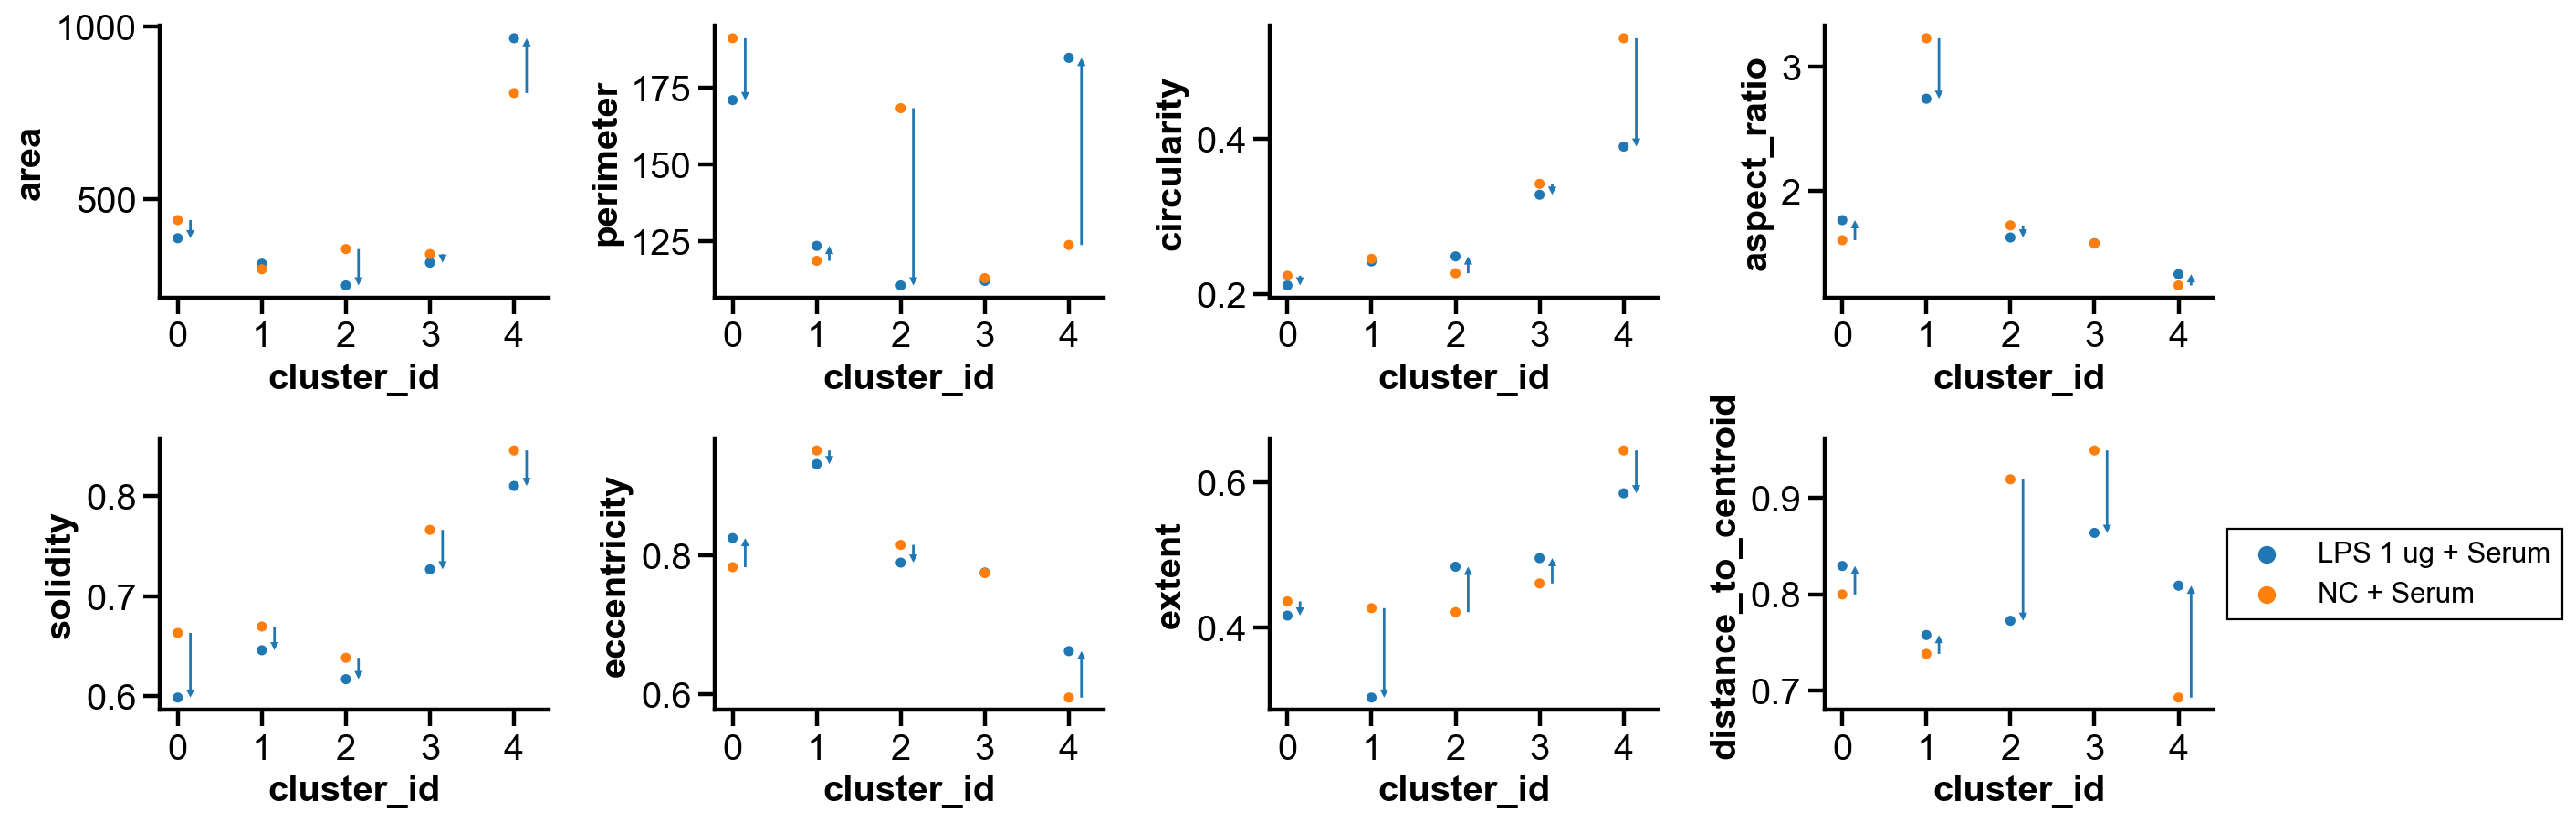

In [29]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=injury_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_category='NC + Serum', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes in response to serum (non-treated control)

In [30]:
injury_df = apply_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
injury_cond = (injury_df['treatment'].isin(['NC', 'NC + Serum']))
injury_df = injury_df[injury_cond]
injury_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid,other_time
20,NC,0,15.0,13.0,503.331331,543.729798,390.5,157.127940,38.258970,20.177386,0.801542,0.644778,0.437562,0.219451,1.672432,0.863200,0.0
21,NC,1,15.0,24.0,585.876623,807.656888,256.0,119.189863,35.998424,14.851912,0.919221,0.565410,0.350000,0.212582,2.539729,0.756659,0.0
22,NC,2,15.0,29.0,661.829730,701.530303,285.0,124.296465,33.763321,17.466085,0.824216,0.615385,0.386964,0.210219,1.765926,0.803503,0.0
23,NC,3,15.0,24.5,528.190024,1003.384027,458.5,158.124892,34.211316,20.546226,0.767060,0.682493,0.471104,0.262756,1.558666,0.934323,0.0
24,NC,4,15.0,31.0,777.570205,866.413057,404.0,107.775649,28.082871,19.928875,0.654504,0.785714,0.584586,0.452141,1.322650,0.811205,0.0


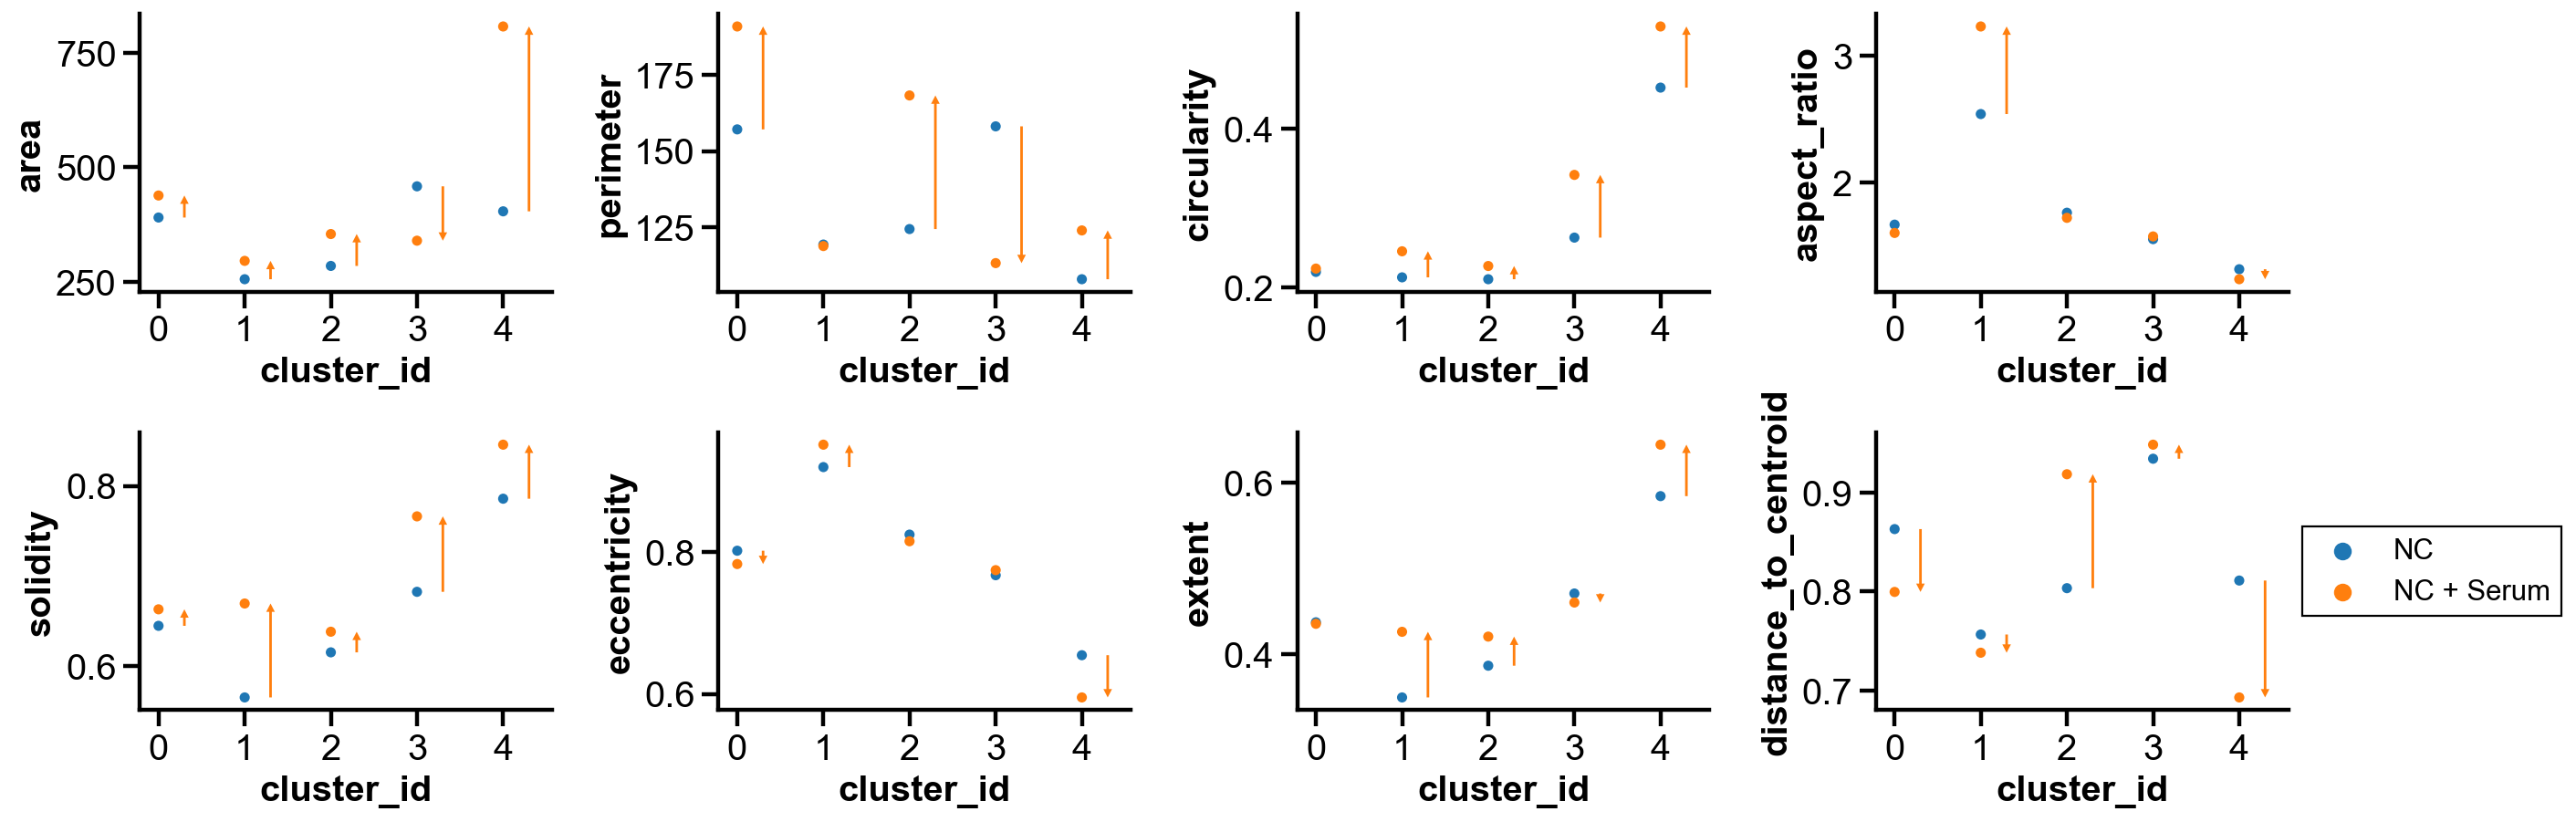

In [31]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=injury_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_category='NC', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes in response to serum (LPS)

In [32]:
injury_df = apply_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
injury_cond = (injury_df['treatment'].isin(['LPS 1 ug + Serum', 'LPS 1 ug']))
injury_df = injury_df[injury_cond]
injury_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid,other_time
5,LPS 1 ug,0,10.0,28.0,779.601594,702.261111,349.0,149.917785,32.641177,20.375013,0.789449,0.650289,0.429513,0.223014,1.629153,0.836327,0.0
6,LPS 1 ug,1,10.0,30.0,632.415730,847.872464,345.0,136.568542,39.288843,14.806319,0.914680,0.651521,0.369231,0.241719,2.474152,0.828389,0.0
7,LPS 1 ug,2,10.0,31.0,808.073080,711.507296,389.0,136.988853,32.932600,20.154625,0.808744,0.631878,0.423804,0.221446,1.700216,0.805262,0.0
8,LPS 1 ug,3,10.0,35.0,903.036079,803.282478,433.5,123.204581,32.108135,19.750339,0.755256,0.755995,0.527666,0.303144,1.525734,0.838316,0.0
9,LPS 1 ug,4,10.0,44.0,865.993997,693.896552,369.0,96.361436,25.960735,19.245045,0.624718,0.829787,0.588040,0.495733,1.280655,0.748133,0.0


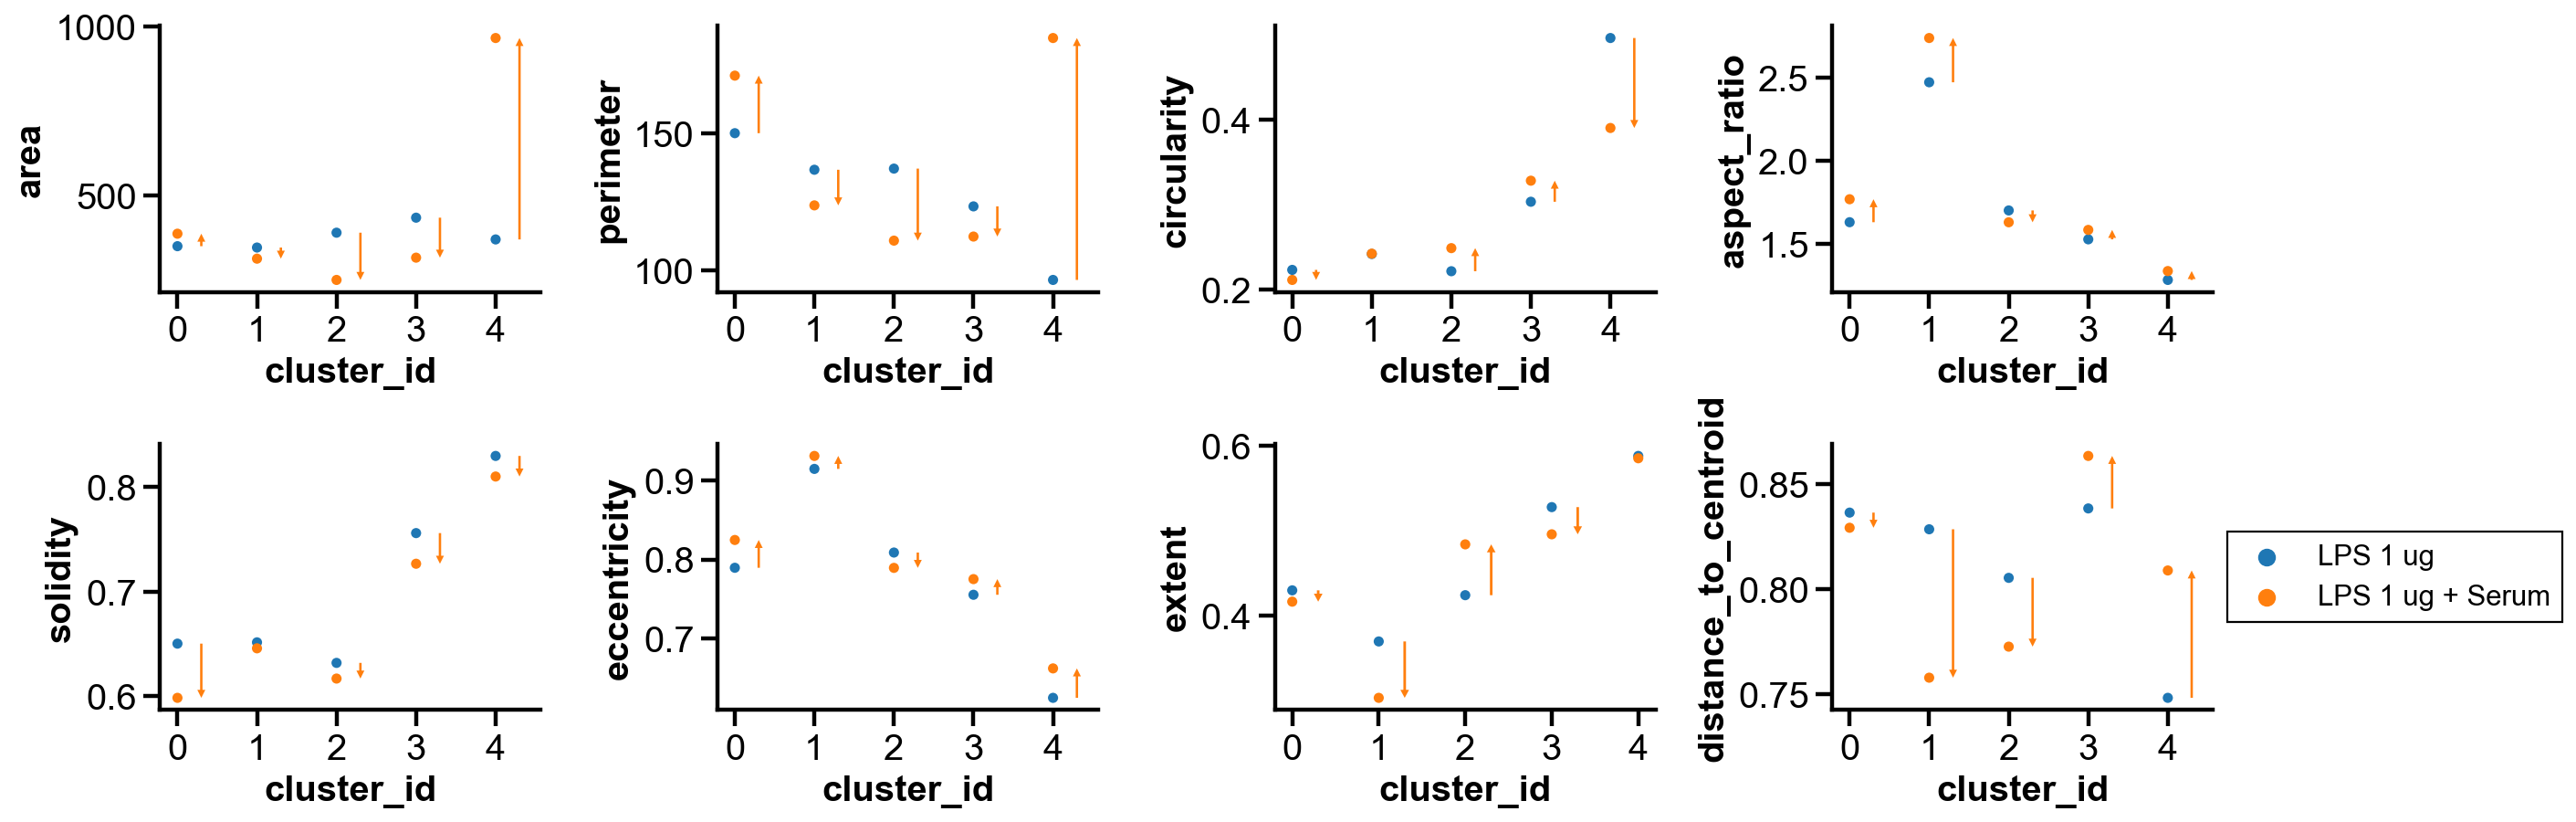

In [33]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=injury_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_category='LPS 1 ug', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()